# Diferencias finitas

## Aproximación por diferencias finitas

Tomado de _Finite Difference Methods for Ordinary and Partial Differential Equations de Randall LeVeque_

Supongamos que queremos aproximar la derivada $u'(x_0)$ usando una diferencia
finita a partir de los valores de $u$ para puntos cercanos a $x_0$. Una elección natural sería

$$D_{+} u(x_0) \equiv \frac{u(x_0 + h) - u(x_0)}{h}\, .$$

para valores pequeños de $h$. Esto parte de la definición de derivada cuando $h\rightarrow 0$. Note
que $D_+ u(x_0)$ es la pendiente de la recta que interpola los puntos $x_0$ y $x_0 + h$.

La ecuación anterior es una aproximación lateral a la derivada $u'$ ya que $u$ está evaluada
únicamente para valores $x \geq x_0$. Otra aproximación lateral podría ser


$$D_{-} u(x_0) \equiv \frac{u(x_0) - u(x_0 - h)}{h}\, .$$

Estas dos fórmulas dan una aproximación de primer orden para $u(x_0)$, lo que significa
que el error es (más o menos) proporcional a $h$.

Otra posibilidad es usar la aproximación centrada

$$D_0 u(x_0) \equiv \frac{u(x_0 + h) - u(x_0 - h)}{2h} = \frac{1}{2}\left[D_{+} u(x_0) + D_{-} u(x_0)\right]\, .$$

Esta es la pendiente de la recta que interpola $u$ entre $x_0 - h$ y $x_0 + h$ y se obtiene
como el promedio de las dos aproximaciones laterales anteriores. En la figura podemos ver que
$D_0 u(x_0)$ brinda una mejor aproximación que cualquiera de las aproximaciones
laterales. De hecho, esta es una aproximación de segundo orden—el error es proporcional
a $h^2$ y por tanto es más pequeña que una aproximación de primer orden cuando $h$
es pequeño.


<img src="./ejemplo_diferencias_finitas.svg">

Es posible tener otras aproximaciones, por ejemplo,

$$D_3 u(x_0) \equiv \frac{1}{6h}\left[ 2 u(x_0 + h) + 3 u(x_0) - 6 u(x_0 -h) + u(x_0 - 2h)\right]\, .$$

Esta es una aproximación de tercer orden para la derivada.

### Ejemplo 1

Tomemos $u(x) = \sin(x)$ y $x_0 = 1$; estamos aproximando $u'(1) = \cos(1) = 0.5403023.$



In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
fun = lambda x: np.sin(np.asarray(x))
grad = lambda x: np.cos(np.asarray(x))

Ahora, definamos algunas funciones para estimar las derivadas usando estos métodos.

In [9]:
def D_p(x, h, fun):
    return (fun(x + h) - fun(x))/h


def D_m(x, h, fun):
    return (fun(x) - fun(x - h))/h


def D_0(x, h, fun):
    return (fun(x + h) - fun(x - h))/(2*h)


def D_3(x, h, fun):
    return (2*fun(x + h) + 3*fun(x) - 6*fun(x - h) + fun(x - 2*h))/(6*h)

In [14]:
h = np.logspace(-1, -3, 5)
x0 = 1.0

In [15]:
h

array([0.1       , 0.03162278, 0.01      , 0.00316228, 0.001     ])

La estimación de las pendientes sería

In [23]:
pendiente_ex = grad(x0)
pendiente_p = D_p(x0, h, fun)
pendiente_m = D_m(x0, h, fun)
pendiente_0 = D_0(x0, h, fun)
pendiente_3 = D_3(x0, h, fun)

Si graficáramos estos valores obtendríamos

In [27]:
pd.DataFrame(np.array([h, pendiente_p, pendiente_m, pendiente_0, pendiente_3]).T,
             columns=["$h$", "$D_p$", "$D_m$", "$D_0$", "$D_3$"])

,$h$,$D_p$,$D_m$,$D_0$,$D_3$
0,0.100000,0.497364,0.581441,0.539402,0.540371
1,0.031623,0.526909,0.553516,0.540212,0.540305
2,0.010000,0.536086,0.544501,0.540293,0.540302
3,0.003162,0.538971,0.541632,0.540301,0.540302
4,0.001000,0.539881,0.540723,0.540302,0.540302


Si calculamos el error

In [28]:
error_p = pendiente_ex - pendiente_p
error_m = pendiente_ex - pendiente_m
error_0 = pendiente_ex - pendiente_0
error_3 = pendiente_ex - pendiente_3

In [29]:
pd.DataFrame(np.array([h, error_p, error_m, error_0, error_3]).T,
             columns=["$h$", "$E_p$", "$E_m$", "$E_0$", "$E_3$"])

,$h$,$E_p$,$E_m$,$E_0$,$E_3$
0,0.100000,0.042939,-0.041138,9.000537e-04,-6.820693e-05
1,0.031623,0.013394,-0.013214,9.004588e-05,-2.199093e-06
2,0.010000,0.004216,-0.004198,9.004993e-06,-6.994130e-08
3,0.003162,0.001331,-0.001330,9.005034e-07,-2.215656e-09
4,0.001000,0.000421,-0.000421,9.005045e-08,-6.997947e-11


Vemos que

\begin{align}
&D_+ u(x_0) - u'(x_0) \approx 0.42 h\, ,\\
&D_0 u(x_0) - u'(x_0) \approx 0.09 h^2\, ,\\
&D_3 u(x_0) - u'(x_0) \approx 0.007 h^3\, ,
\end{align}

lo que confirma que los métodos son de primero, segundo y tercer orden.

La siguiente gráfica presenta los errores graficados contra $h$
en una escala log-log. Esta es una buena manera de graficar los errores cuando
esperamos un comportamiento que es una potencia de $h$, ya que el error
se comporta como

$$E(h) \approx Ch^p\, ,$$

entonces

$$\log |E(h)| \approx \log|C| + p\log h\, .$$


Entonces, en una escala log-log el error se comporta como una línea recta
con pendiente igual a $p$, que es el orden de la aproximación.

<IPython.core.display.Javascript object>


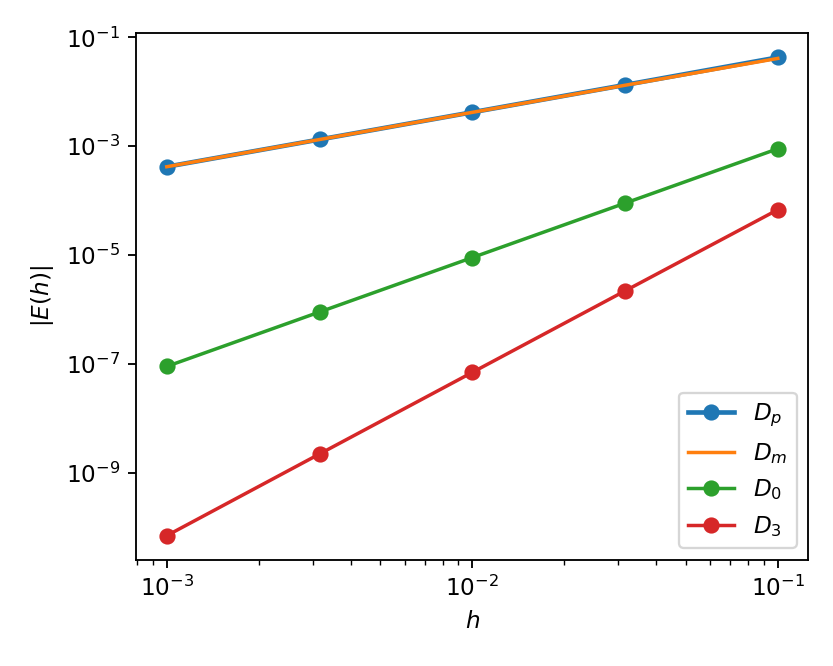

In [30]:
plt.figure(figsize=(5, 4))
plt.loglog(h, np.abs(np.cos(x0) - pendiente_p), lw=2, marker="o")
plt.loglog(h, np.abs(np.cos(x0) - pendiente_m))
plt.loglog(h, np.abs(np.cos(x0) - pendiente_0), marker="o")
plt.loglog(h, np.abs(np.cos(x0) - pendiente_3), marker="o")
plt.xlabel("$h$")
plt.ylabel("$|E(h)|$")
plt.legend(["$D_p$", "$D_m$", "$D_0$", "$D_3$"])
plt.tight_layout()